# Everyone Can Learn Data Scholarship

# 1️⃣ Part 1 (Python) - Dinosaur data 🦕

## 📖 Background
You're applying for a summer internship at a national museum for natural history. The museum recently created a database containing all dinosaur records of past field campaigns. Your job is to dive into the fossil records to find some interesting insights, and advise the museum on the quality of the data. 

In [1]:
# Import the pandas and numpy packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load the data
dinosaurs = pd.read_csv(r"C:\Users\Raymond\Downloads\workspace (2)\workspace\data\dinosaurs.csv")

In [2]:
# Preview the dataframe
dinosaurs

,occurrence_no,name,diet,type,length_m,max_ma,min_ma,region,lng,lat,class,family
0,130294,Protarchaeopteryx,omnivorous,small theropod,2.0,130.0,122.46,Liaoning,120.733330,41.799999,Saurischia,Archaeopterygidae
1,130295,Caudipteryx,omnivorous,small theropod,1.0,130.0,122.46,Liaoning,120.733330,41.799999,Saurischia,Caudipterygidae
2,139242,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.528732,50.740726,Saurischia,Tyrannosauridae
3,139250,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.549347,50.737015,Saurischia,Tyrannosauridae
4,139252,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.564636,50.723866,Saurischia,Tyrannosauridae
...,...,...,...,...,...,...,...,...,...,...,...,...
4946,1360627,Isaberrysaura,NaN,NaN,NaN,171.6,168.40,Neuquén,-70.263290,-39.205288,Ornithischia,NaN
4947,1363632,Stegosaurus,herbivorous,armored dinosaur,9.0,157.3,152.10,Wyoming,-107.816666,44.650002,Ornithischia,Stegosauridae
4948,1363633,Othnielosaurus,NaN,NaN,NaN,157.3,152.10,Wyoming,-107.816666,44.650002,Ornithischia,NaN
4949,1364695,Iguanodon,herbivorous,ornithopod,10.0,145.0,139.80,Niedersachsen,9.959357,52.341167,Ornithischia,NaN


## 💪 Challenge I
Help your colleagues at the museum to gain insights on the fossil record data. Include:


1. How many different dinosaur names are present in the data?
2. Which was the largest dinosaur? What about missing data in the dataset?
3. What dinosaur type has the most occurrences in this dataset? Create a visualization (table, bar chart, or equivalent) to display the number of dinosaurs per type. Use the AI assistant to tweak your visualization (colors, labels, title...).
4. Did dinosaurs get bigger over time? Show the relation between the dinosaur length and their age to illustrate this.
5. Use the AI assitant to create an interactive map showing each record. 
6. Any other insights you found during your analysis?

## 🧑‍⚖️ Judging criteria  
<p>&nbsp;</p>
<p><strong>Public Upvotes</strong> - The top 100 most upvoted entries will be judged according to the criteria below. Entries in position 101 or below will not proceed to the next stage. Only votes made by accounts registered before voting opens will count towards final decisions.</p>

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Response quality** | 65%       | <ul><li> Accuracy (20%) - The response must be representative of the original data and free from errors.</li><li> Clarity (20%) - The response must be easy to understand and clearly expressed.</li><li> Completeness (15%) - The response must be a full report that responds to the question posed.</li><li> Insights (10%) - The response must contain some insights based on the data using your own judgment and interpretation.</li></ul>       |
| **Storytelling**  | 20%       | <ul><li>How well the response is connected to the original data. </li><li>How the narrative and whole response connects together.</li><li>The report contains sufficient depth but is also concise.</li><li>How the response flows from one point to the next. </ul> |
| **Presentation** | 15% | <ul><li>How legible/understandable the response is.</li><li>How well-formatted the response is.</li><li>Spelling and grammar.</li></ul> |

In the event of a tie, user XP may be used as a tie-breaker. 

# SOLUTION TO CHALLENGE 1

### Exploring the Dinosaur Dataset

In [3]:
dinosaurs.shape

(4951, 12)

Displaying the basic information about the Dinosaurs Dataset

In [4]:
print(dinosaurs.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   occurrence_no  4951 non-null   int64  
 1   name           4951 non-null   object 
 2   diet           3596 non-null   object 
 3   type           3596 non-null   object 
 4   length_m       3568 non-null   float64
 5   max_ma         4951 non-null   float64
 6   min_ma         4951 non-null   float64
 7   region         4909 non-null   object 
 8   lng            4951 non-null   float64
 9   lat            4951 non-null   float64
 10  class          4951 non-null   object 
 11  family         3494 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 464.3+ KB
None


# Cleaning, and Preparing the Dataset
### Checking for missing values

1. We first remove all rows that do not have 'region'. This is because the Dinosaur's recodes should be found in a specific region that gives existence that Dinosaurs lived and 'region' is a crucial column to our analysis. 
2. We will fill in the missing data for the 'length_m' with the 'mean values of the length_m' column. This cleaning process helps maintain the large data size to better represent the original data set. Knowing that it is possible not to know all the types of Dinosaurs types, however, the length_m is also crucial to get more insight into our analysis. 
3. We then filter out all columns excluding 'family' and use this new data to find insights.

In [5]:
# Remove rows where 'region' is missing
cleaned0 = dinosaurs.dropna(subset=['region'])

# Display the updated shape and head of the dataframe
cleaned0.shape


(4909, 12)

### Filling missing values in 'length_m' with the mean value

In [6]:
# Fill missing values in 'length_m' with the mean value
mean_length_m = cleaned0['length_m'].mean()
cleaned0['length_m'].fillna(mean_length_m, inplace=True)

# Remove rows where 'type' is missing
cleaned1 = cleaned0.dropna(subset=['type'])

# Remove rows where 'region' is missing
cleaned2 = cleaned1.dropna(subset=['region'])

# Display the updated shape and head of the dataframe
cleaned2.shape
#cleaned.head()

C:\Users\Raymond\AppData\Local\Temp\ipykernel_24508\2621760062.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned0['length_m'].fillna(mean_length_m, inplace=True)


(3579, 12)

In [7]:
# Filtering out 'family' columns
filtered = cleaned2.drop(columns=['family'])

# Display the updated shape and head of the dataframe
filtered.shape
#filtered.head()



(3579, 11)

In [8]:
filtered


,occurrence_no,name,diet,type,length_m,max_ma,min_ma,region,lng,lat,class
0,130294,Protarchaeopteryx,omnivorous,small theropod,2.0,130.0,122.46,Liaoning,120.733330,41.799999,Saurischia
1,130295,Caudipteryx,omnivorous,small theropod,1.0,130.0,122.46,Liaoning,120.733330,41.799999,Saurischia
2,139242,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.528732,50.740726,Saurischia
3,139250,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.549347,50.737015,Saurischia
4,139252,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.564636,50.723866,Saurischia
...,...,...,...,...,...,...,...,...,...,...,...
4942,1350474,Triceratops,herbivorous,ceratopsian,9.0,72.1,66.00,Montana,-105.078613,45.678333,Ornithischia
4943,1350475,Pachycephalosaurus,herbivorous,ornithopod,8.0,72.1,66.00,Montana,-105.078613,45.678333,Ornithischia
4944,1358692,Stegosaurus,herbivorous,armored dinosaur,9.0,157.3,145.00,Colorado,-108.728333,39.158890,Ornithischia
4947,1363632,Stegosaurus,herbivorous,armored dinosaur,9.0,157.3,152.10,Wyoming,-107.816666,44.650002,Ornithischia


In [9]:
print('All missing values has been delected from each column')
filtered.isnull().sum()

All missing values has been delected from each column


occurrence_no    0
name             0
diet             0
type             0
length_m         0
max_ma           0
min_ma           0
region           0
lng              0
lat              0
class            0
dtype: int64

In [10]:
# We ensure the Data Types Are Correct
print(filtered.dtypes)

occurrence_no      int64
name              object
diet              object
type              object
length_m         float64
max_ma           float64
min_ma           float64
region            object
lng              float64
lat              float64
class             object
dtype: object


# Analysis Process


## Statistical Summary and Insights

In [11]:

# Statistical summary for numerical columns
numerical_summary = filtered.describe()

# Insights into categorical columns
categorical_columns = ['type', 'diet', 'region', 'class']
categorical_summary = filtered[categorical_columns].describe()

# Display summaries
numerical_summary, categorical_summary
 

(       occurrence_no     length_m       max_ma       min_ma          lng  \
 count   3.579000e+03  3579.000000  3579.000000  3579.000000  3579.000000   
 mean    6.563576e+05     8.215424   112.848843   102.303551   -48.313145   
 std     2.981425e+05     6.612620    42.735709    42.005354    81.225692   
 min     1.302090e+05     0.450000    70.600000    66.000000  -153.247498   
 25%     4.819335e+05     3.000000    83.500000    66.000000  -108.811302   
 50%     5.393260e+05     6.800000    83.600000    72.100000  -104.628464   
 75%     7.841910e+05    10.000000   155.700000   145.000000     8.709167   
 max     1.364695e+06    35.000000   252.170000   247.200000   565.000000   
 
                lat  
 count  3579.000000  
 mean     38.176831  
 std      19.621592  
 min     -48.099998  
 25%      38.779999  
 50%      43.529167  
 75%      48.633301  
 max      70.090096  ,
               type         diet   region       class
 count         3579         3579     3579        357

### Distributions for Numerical Data type

In [12]:
# Extract columns of numerical data type from 'filtered'
numerical_columns = filtered.select_dtypes(include=['number']).columns
numerical_columns

Index(['occurrence_no', 'length_m', 'max_ma', 'min_ma', 'lng', 'lat'], dtype='object')

#### Display length in descending order

In [13]:
# Extract unique names and their corresponding 'length_m'
unique_names_length = filtered[['name', 'length_m']].drop_duplicates()

# Sort by 'length_m' in descending order
unique_names_length_sorted = unique_names_length.sort_values(by='length_m', ascending=False)

# Display the sorted DataFrame
unique_names_length_sorted

,name,length_m
570,Supersaurus,35.00
1165,Argentinosaurus,35.00
336,Brachiosaurus,30.00
633,Paralititan,28.00
28,Diplodocus,26.00
...,...,...
215,Compsognathus,0.65
273,Shuvuuia,0.60
4286,Micropachycephalosaurus,0.60
3686,Microceratus,0.50


### Correlations between Dinosaurs length and age

In [14]:
# Extract 'length_m' and 'max_ma' columns
length_max_ma = filtered[['length_m', 'max_ma']]

# Calculate the correlation between 'length_m' and 'max_ma'
correlation_length_max_ma = length_max_ma.corr()

# Display the correlation matrix
correlation_length_max_ma

,length_m,max_ma
length_m,1.000000,0.299845
max_ma,0.299845,1.000000


### Analysis of Categorical Data type

In [15]:
# Extract columns of categorical data type from 'filtered'
categorical_columns = filtered.select_dtypes(include=['object']).columns
categorical_columns

Index(['name', 'diet', 'type', 'region', 'class'], dtype='object')

In [16]:
# Extract unique names and their corresponding types
unique_names_types = filtered[['name', 'type']].drop_duplicates()

# Display the unique names and corresponding types
unique_names_types

,name,type
0,Protarchaeopteryx,small theropod
1,Caudipteryx,small theropod
2,Gorgosaurus,large theropod
7,Albertosaurus,large theropod
12,Isisaurus,sauropod
...,...,...
4287,Udanoceratops,ceratopsian
4296,Yinlong,ceratopsian
4303,Homalocephale,ornithopod
4305,Oryctodromeus,ornithopod


## Geographical Analysis

In [17]:
# Display the head of 'filtered' with selected columns: 'name', 'occurrence_no', 'lat', 'lng'
# Removed 'continent' as it is not in the DataFrame's columns
filtered_head = filtered[['name', 'occurrence_no', 'lat', 'lng']].head()
filtered_head

,name,occurrence_no,lat,lng
0,Protarchaeopteryx,130294,41.799999,120.733330
1,Caudipteryx,130295,41.799999,120.733330
2,Gorgosaurus,139242,50.740726,-111.528732
3,Gorgosaurus,139250,50.737015,-111.549347
4,Gorgosaurus,139252,50.723866,-111.564636


# VISUALIZATION

### 1. Distribution plots for numerical columns with different colors

C:\Users\Raymond\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Raymond\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Raymond\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Raymond\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

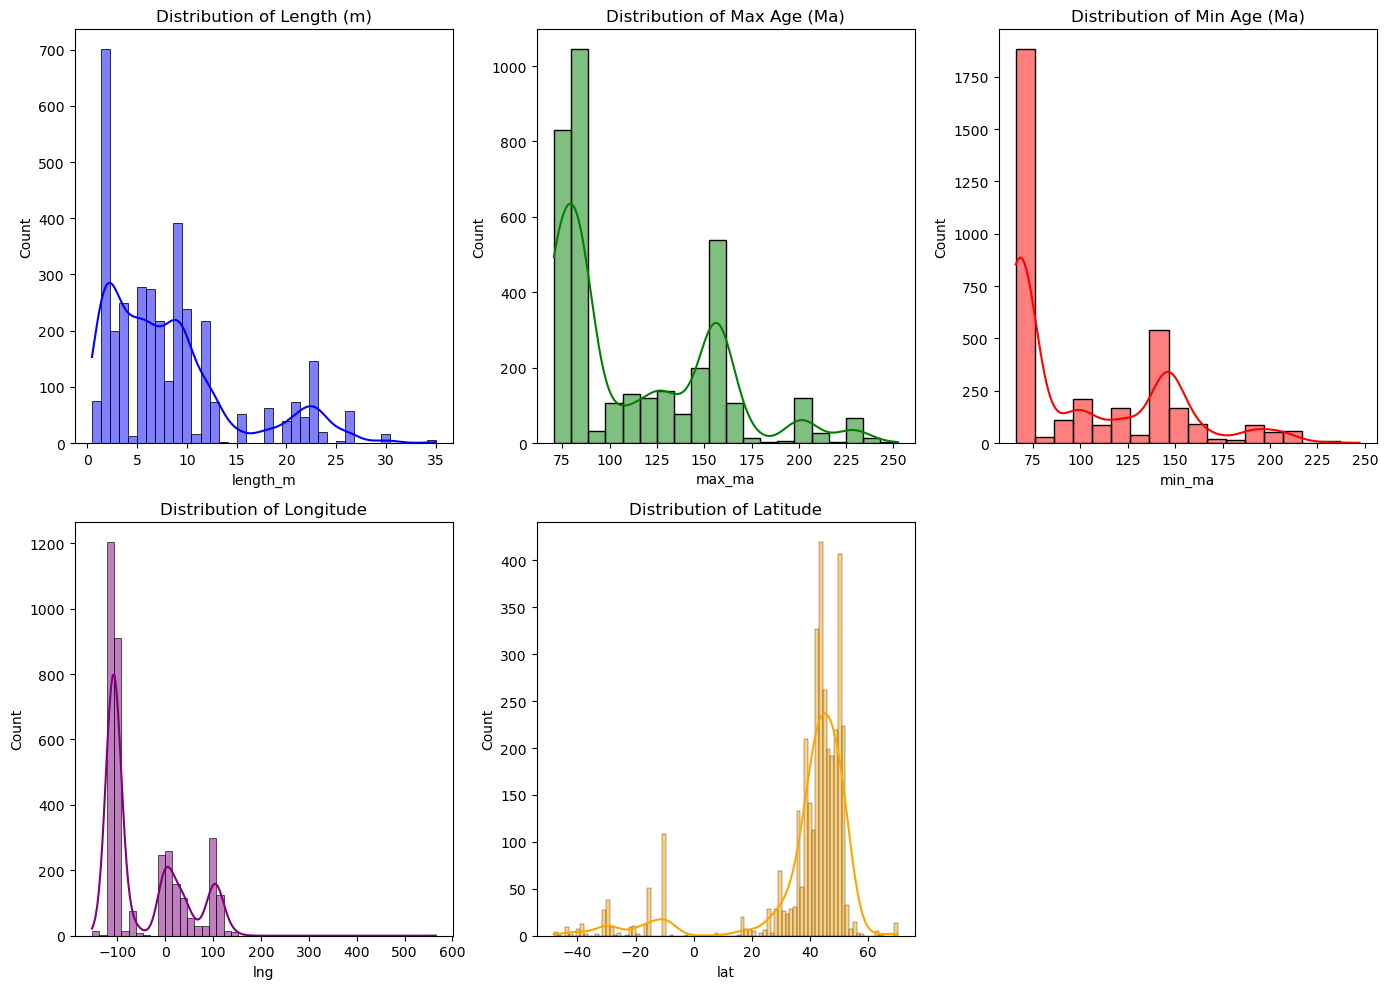

In [18]:
# Distribution plots for numerical columns with different colors

plt.figure(figsize=(14, 10))

plt.subplot(2, 3, 1)
sns.histplot(filtered['length_m'], kde=True, color='blue')
plt.title('Distribution of Length (m)')

plt.subplot(2, 3, 2)
sns.histplot(filtered['max_ma'], kde=True, color='green')
plt.title('Distribution of Max Age (Ma)')

plt.subplot(2, 3, 3)
sns.histplot(filtered['min_ma'], kde=True, color='red')
plt.title('Distribution of Min Age (Ma)')

plt.subplot(2, 3, 4)
sns.histplot(filtered['lng'], kde=True, color='purple')
plt.title('Distribution of Longitude')

plt.subplot(2, 3, 5)
sns.histplot(filtered['lat'], kde=True, color='orange')
plt.title('Distribution of Latitude')

plt.tight_layout()
plt.show(block=False)

# Insights of the Distribbution Plots
### Distribution of Length (m):
The histogram shows the frequency of different lengths of dinosaurs in meters.
The plot indicates that most dinosaurs in the dataset have lengths between 0 and 10 meters, with a peak around 2 meters.
There are a few outliers with lengths extending up to 35 meters.
This suggests that smaller dinosaurs were more frequently recorded or discovered compared to larger ones.

### Distribution of Max Age (Ma):
This histogram represents the distribution of the maximum ages (in millions of years) of the dinosaur fossils.
The majority of fossils have a max age between 75 and 150 million years, with notable peaks around 100 million years and 150 million years.
There are fewer fossils with ages greater than 150 million years.
This distribution might indicate periods of high dinosaur activity or better preservation conditions during these periods.

### Distribution of Min Age (Ma):
Similar to the max age distribution, this histogram shows the distribution of the minimum ages of the dinosaur fossils.
The distribution pattern is similar to the max age, with peaks around 75 to 150 million years.
This suggests a consistent period range for the existence or discovery of the fossils in the dataset.

### Distribution of Longitude:
This histogram displays the distribution of the longitudes where the fossils were found.
The data shows significant peaks around longitudes -100 to 0, indicating many discoveries in these regions.
The pattern suggests that certain longitudes have been more fruitful for fossil discoveries, possibly due to geological or paleontological reasons.

### Distribution of Latitude:
The histogram for latitude shows the frequency of fossil discoveries across different latitudes.
The data indicates a higher number of discoveries between latitudes -20 to 60.
This might reflect the geographical distribution of landmasses and habitable zones for dinosaurs during their existence.

### 2. Bar plots for categorical columns

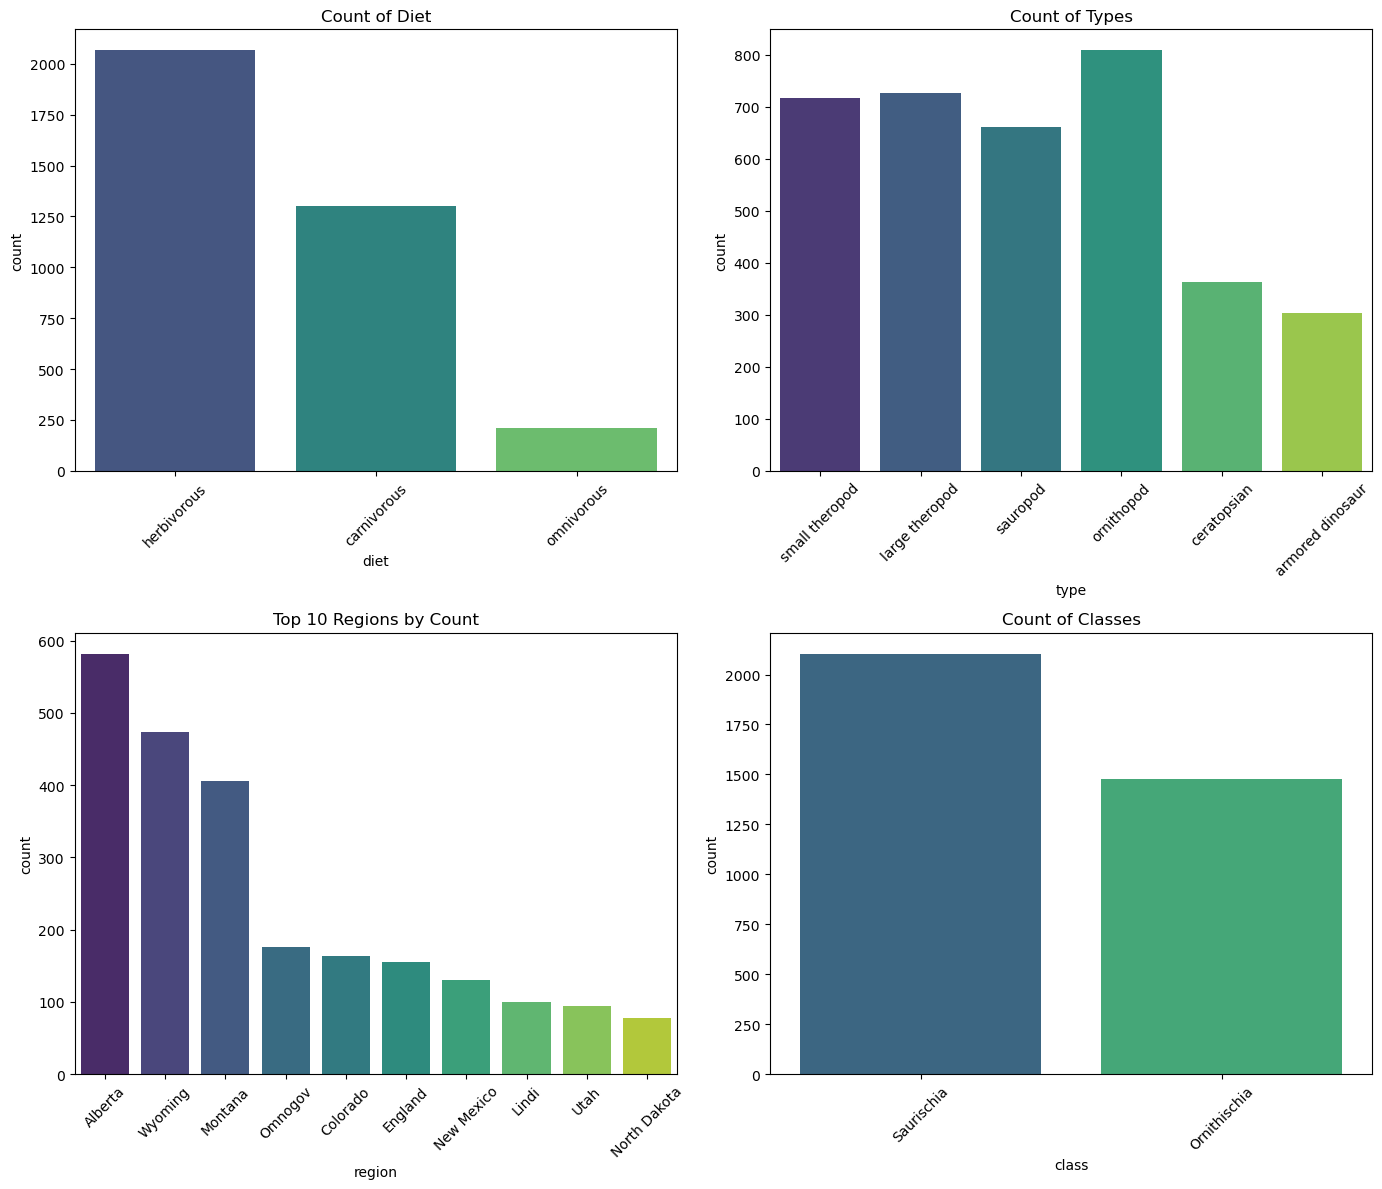

In [19]:
plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
sns.countplot(x=filtered['diet'], order=filtered['diet'].value_counts().index[:10], palette='viridis')
plt.title('Count of Diet')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.countplot(x=filtered['type'], palette='viridis')
plt.title('Count of Types')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
sns.countplot(x=filtered['region'], order=filtered['region'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Regions by Count')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
sns.countplot(x=filtered['class'], palette='viridis')
plt.title('Count of Classes')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

## Insights of the Count Plot
### Diet Distribution: 
The dataset is dominated by herbivorous dinosaurs, suggesting either a higher prevalence of herbivores or better preservation conditions for herbivorous fossils.
### Type Distribution: 
The most common types are 'ornithopod' and 'sauropod', indicating these types were either more numerous or easier to find and classify.
### Geographical Distribution: 
Certain regions like Alberta and Wyoming are major hotspots for dinosaur discoveries, indicating these areas were either rich in dinosaur activity or have been extensively explored.
### Class Distribution: 
The dominance of the 'Saurischia' class suggests it was more diverse or had better preservation conditions compared to 'Ornithischia'.


### plot of length on diet

C:\Users\Raymond\AppData\Local\Temp\ipykernel_24508\3465747807.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='diet', y='length_m', data=filtered, palette='viridis', ci=None)
C:\Users\Raymond\AppData\Local\Temp\ipykernel_24508\3465747807.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='region', y='length_m', data=filtered, order=filtered['region'].value_counts().index[:10], palette='viridis', ci=None)


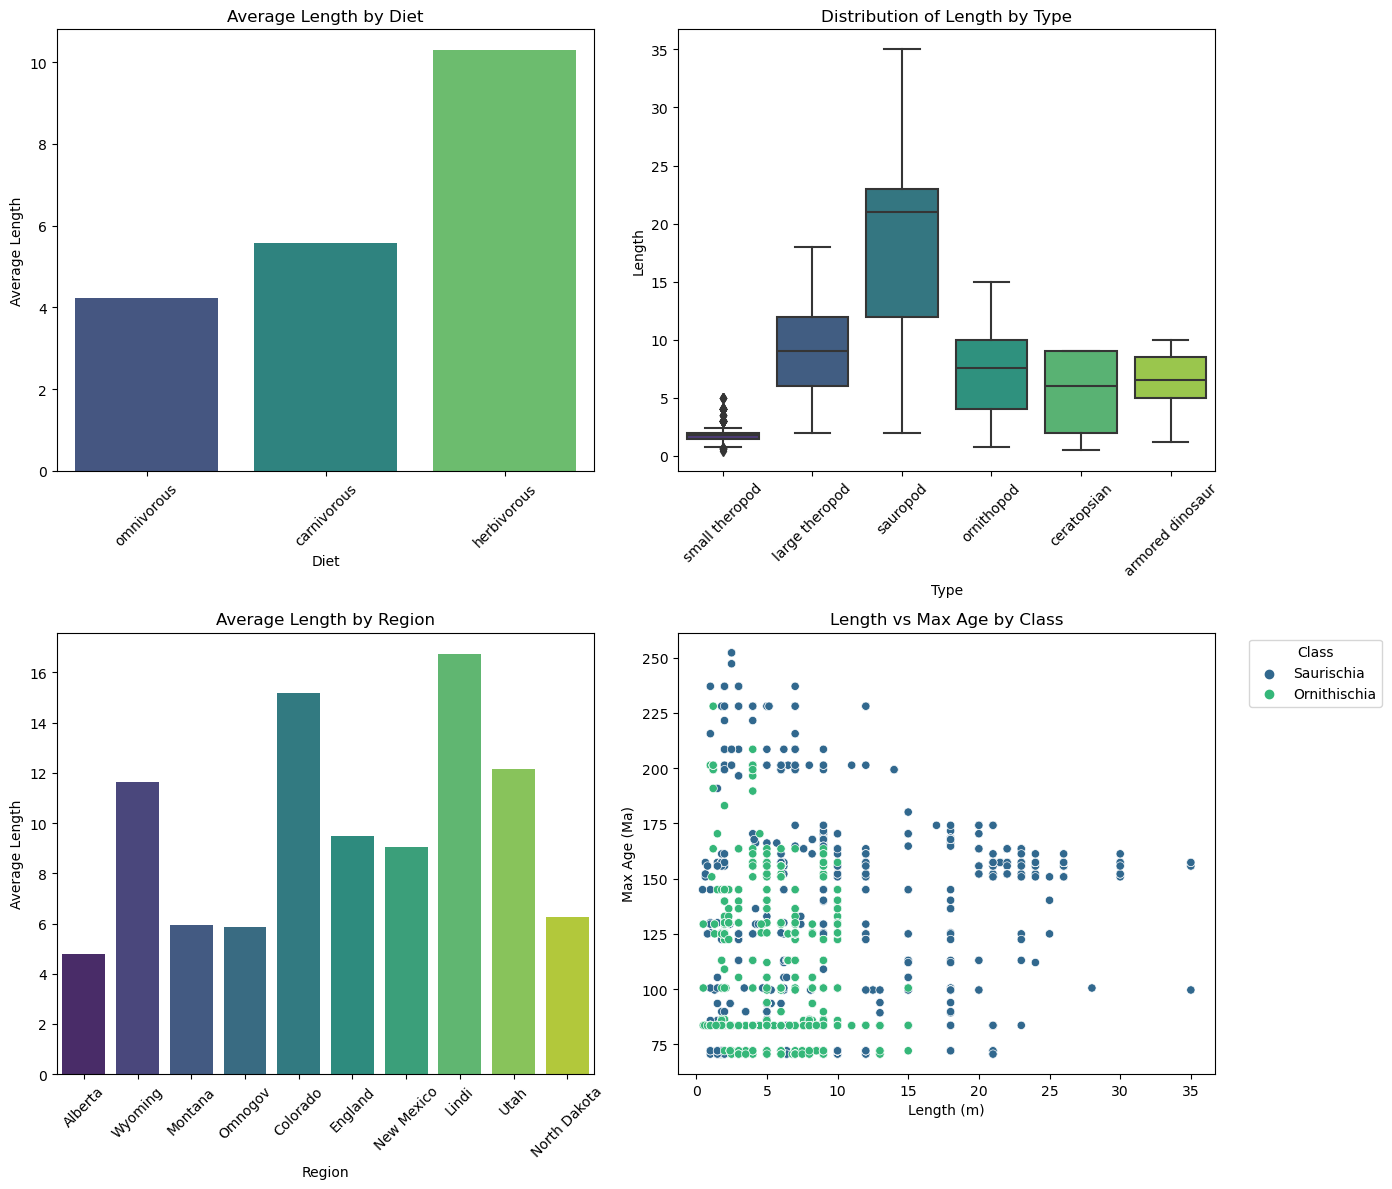

In [20]:
plt.figure(figsize=(14, 12))

# Subplot 1: Average Length by Diet (Bar Plot)
plt.subplot(2, 2, 1)
sns.barplot(x='diet', y='length_m', data=filtered, palette='viridis', ci=None)
plt.title('Average Length by Diet')
plt.xlabel('Diet')
plt.ylabel('Average Length')
plt.xticks(rotation=45)

# Subplot 2: Distribution of Length by Type (Box Plot)
plt.subplot(2, 2, 2)
sns.boxplot(x='type', y='length_m', data=filtered, palette='viridis')
plt.title('Distribution of Length by Type')
plt.xlabel('Type')
plt.ylabel('Length')
plt.xticks(rotation=45)

# Subplot 3: Average Length by Region (Bar Plot)
plt.subplot(2, 2, 3)
sns.barplot(x='region', y='length_m', data=filtered, order=filtered['region'].value_counts().index[:10], palette='viridis', ci=None)
plt.title('Average Length by Region')
plt.xlabel('Region')
plt.ylabel('Average Length')
plt.xticks(rotation=45)

# Subplot 4: Length vs Max Age (Scatter Plot)
plt.subplot(2, 2, 4)
sns.scatterplot(x='length_m', y='max_ma', data=filtered, hue='class', palette='viridis')
plt.title('Length vs Max Age by Class')
plt.xlabel('Length (m)')
plt.ylabel('Max Age (Ma)')
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## Insights from the Additional Dashboard

The provided dashboard contains further visualizations that offer more detailed insights into the dinosaur dataset. 
#### 1. Average Length by Diet

- **Description**: This bar chart shows the average length of dinosaurs based on their diet.
- **Insights**:
  - Herbivorous dinosaurs have the highest average length, indicating that on average, herbivores were larger than carnivores and omnivores.
  - Carnivorous dinosaurs have a moderate average length.
  - Omnivorous dinosaurs are the smallest on average.
  - This suggests that diet may have influenced the size of dinosaurs, with herbivores potentially requiring larger body sizes for foraging large quantities of plant material.

#### 2. Distribution of Length by Type

- **Description**: This box plot displays the distribution of dinosaur lengths categorized by type.
- **Insights**:
  - Sauropods have the highest median and overall length, indicating that they were the largest dinosaur type.
  - Small theropods have the smallest length, with a noticeable cluster of outliers.
  - Large theropods, ornithopods, ceratopsians, and armored dinosaurs have similar length distributions, but none reach the sizes of sauropods.
  - This indicates significant size variation among different dinosaur types, with sauropods being the giants of the dinosaur world.

#### 3. Average Length by Region

- **Description**: This bar chart shows the average length of dinosaurs discovered in various regions.
- **Insights**:
  - Dinosaurs found in Alberta and Utah have the highest average lengths.
  - Other regions like Wyoming, Montana, and New Mexico also have relatively high average lengths.
  - This might reflect the types of dinosaurs prevalent in these regions or the preservation conditions that favor the discovery of larger fossils.
  - Understanding regional differences in dinosaur sizes can guide future excavation and research efforts.

#### 4. Length vs Max Age by Class

- **Description**: This scatter plot shows the relationship between dinosaur length and their maximum age, categorized by class.
- **Insights**:
  - There is no clear linear relationship between length and max age, indicating that dinosaurs did not necessarily get bigger over time.
  - The scatter plot shows clusters of points for different lengths and ages, with both 'Saurischia' and 'Ornithischia' classes represented.
  - The presence of both small and large dinosaurs across various ages suggests a diverse range of dinosaur sizes throughout different periods.
  - This diversity highlights the varying evolutionary pressures and ecological niches occupied by dinosaurs over time.

### Overall Insights from Both Dashboards

Combining the insights from both dashboards, we can conclude:

- **Diet and Size**: Herbivorous dinosaurs tend to be larger on average compared to carnivores and omnivores, possibly due to their dietary requirements.
- **Type and Size**: Sauropods are the largest dinosaur type, with significant size variation among other types.
- **Geographical Distribution**: Certain regions, such as Alberta and Utah, have yielded larger dinosaur fossils on average.
- **Evolutionary Trends**: There is no clear trend indicating that dinosaurs got bigger over time, suggesting a wide range of sizes coexisted throughout different periods.
- **Data Quality**: The dataset appears to be comprehensive, covering a wide range of dinosaur types, diets, and geographical locations, which provides a solid foundation for further research and insights.

## 3. Geographical Analysis and Visualization

Occurrences by Continent: continent
North America    2169
Europe            594
Asia              503
Oceania           251
South America      61
Name: count, dtype: int64


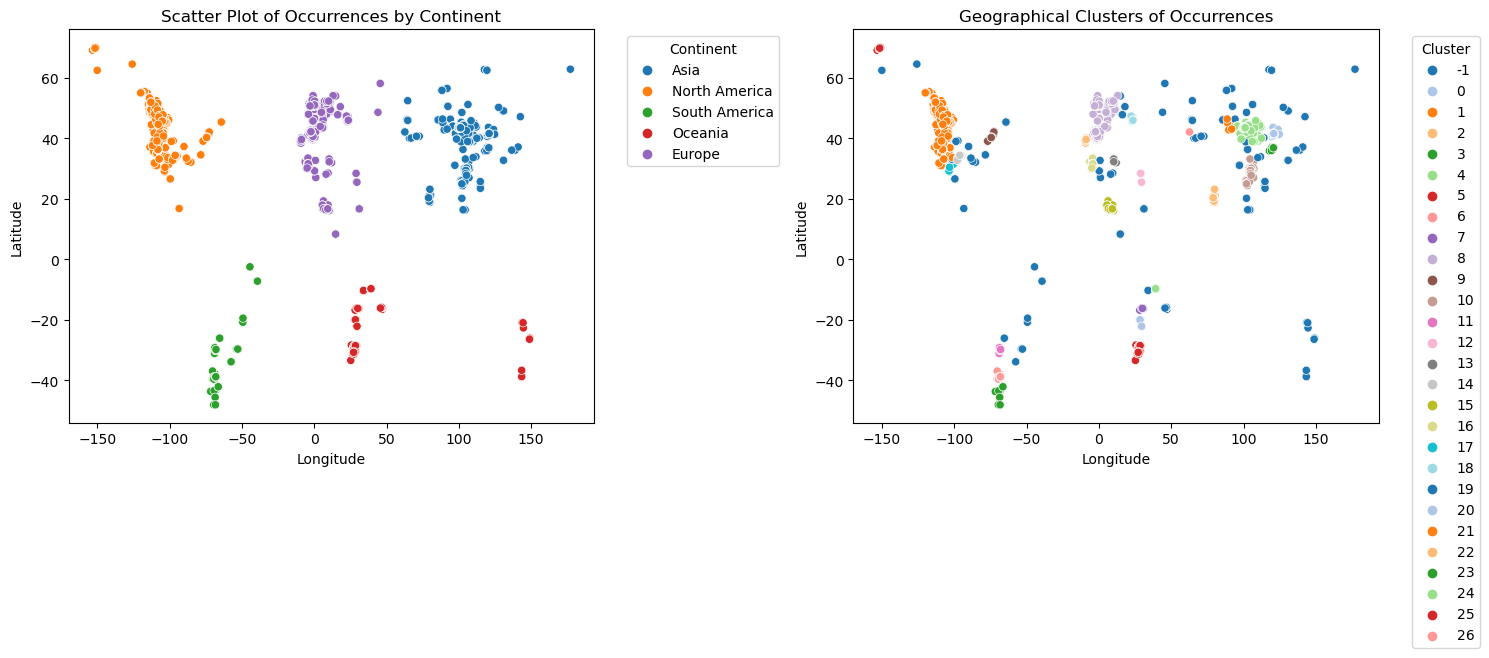

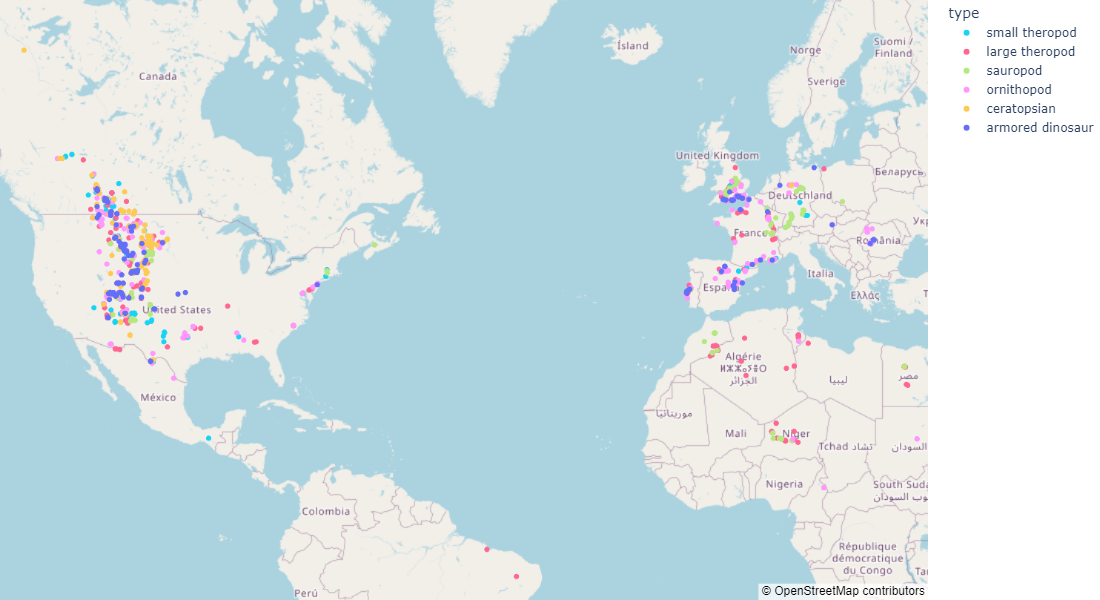

In [29]:
from sklearn.cluster import DBSCAN

# Define a function to map latitude and longitude to continents
def map_to_continent(lat, lon):
    if lat >= -60 and lat <= 90 and lon >= -180 and lon <= 180:
        if lat > 0:
            if lon >= -30 and lon <= 60:
                return 'Europe'
            elif lon > 60 and lon < 180:
                return 'Asia'
            elif lon >= -170 and lon <= -30:
                return 'North America'
            else:
                return 'Africa'
        else:
            if lon >= -170 and lon <= -35:
                return 'South America'
            else:
                return 'Oceania'
    return 'Unknown'

# Apply the function to categorize occurrences by continent
filtered['continent'] = filtered.apply(lambda row: map_to_continent(row['lat'], row['lng']), axis=1)

# Remove rows with 'Unknown' continent
filtered = filtered[filtered['continent'] != 'Unknown']

# Display counts by continent
continent_counts = filtered['continent'].value_counts()
print("Occurrences by Continent:", continent_counts)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot of occurrences by continent
sns.scatterplot(x='lng', y='lat', data=filtered, hue='continent', palette='tab10', ax=axes[0])
axes[0].set_title('Scatter Plot of Occurrences by Continent')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
axes[0].legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')

# Identify geographical clusters using DBSCAN
coords = filtered[['lat', 'lng']].values
db = DBSCAN(eps=3, min_samples=10).fit(coords)
filtered['cluster'] = db.labels_

# Scatter plot with clusters
sns.scatterplot(x='lng', y='lat', data=filtered, hue='cluster', palette='tab20', ax=axes[1])
axes[1].set_title('Geographical Clusters of Occurrences')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')
axes[1].legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


import plotly.express as px

# Create a DataFrame for the map
map_df = filtered[['name', 'lat', 'lng', 'type']].copy()

# Create the interactive map
fig = px.scatter_mapbox(map_df,
                        lat="lat",
                        lon="lng",
                        hover_name="name",
                        color="type",
                        zoom=2,
                        height=600,
                        color_discrete_map={
                            'Theropod': 'red',  # Example: setting 'Theropod' type to red
                            'Sauropod': 'blue',
                            'Ornithopod': 'green',
                            'Ceratopsian': 'purple',
                            'Stegosaur': 'orange'
                        })

# Update the layout of the map
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Display the map
fig.show()

## 1. Scatter Plot of Occurrences by Continent
This scatter plot shows the geographical locations of dinosaur discoveries, categorized by continent.
Different continents are represented by different colors.
The plot shows a significant concentration of dinosaur discoveries in North America (orange), Asia (blue), and Europe (purple).
There are also notable occurrences in South America (green) and Oceania (red).
The distribution indicates that these continents were significant sites of dinosaur activity or have been more extensively explored.
The clustering of points suggests that certain areas within these continents were particularly rich in dinosaur fossils.

## 2. Geographical Clusters of Occurrences
Description: This scatter plot shows the geographical clusters of dinosaur occurrences, identified through clustering analysis.
Different clusters are represented by different colors, indicating groups of occurrences that are geographically close to each other.
The clusters help to identify specific regions within continents that have higher concentrations of dinosaur fossils.
Clustering can reveal patterns that might not be immediately apparent from the raw geographical data.
These clusters can guide further exploration and excavation efforts by highlighting areas with high fossil densities.

## 3. Insights from the Interactive Map
The interactive map displays the geographical distribution of dinosaur discoveries, categorized by type.
### Key Observations:
#### North America and Europe: 
These continents have a high concentration of dinosaur discoveries, indicating extensive exploration and significant paleontological findings.
#### Diversity of Types: 
Various types of dinosaurs, such as small theropods, large theropods, sauropods, ceratopsians, ornithopods, and armored dinosaurs, are spread across different regions.
#### Global Distribution: 
While North America and Europe have dense clusters, other continents like South America, Africa, and Asia also show notable occurrences, demonstrating a global distribution of dinosaur fossils.

In [22]:
# Analyze correlation with latitude and longitude
lat_lng_correlation = filtered[['lat', 'lng']].corr()
print("Correlation between Latitude and Longitude:", lat_lng_correlation)


Correlation between Latitude and Longitude:           lat       lng
lat  1.000000 -0.305403
lng -0.305403  1.000000



## Additional Analysis and Insights

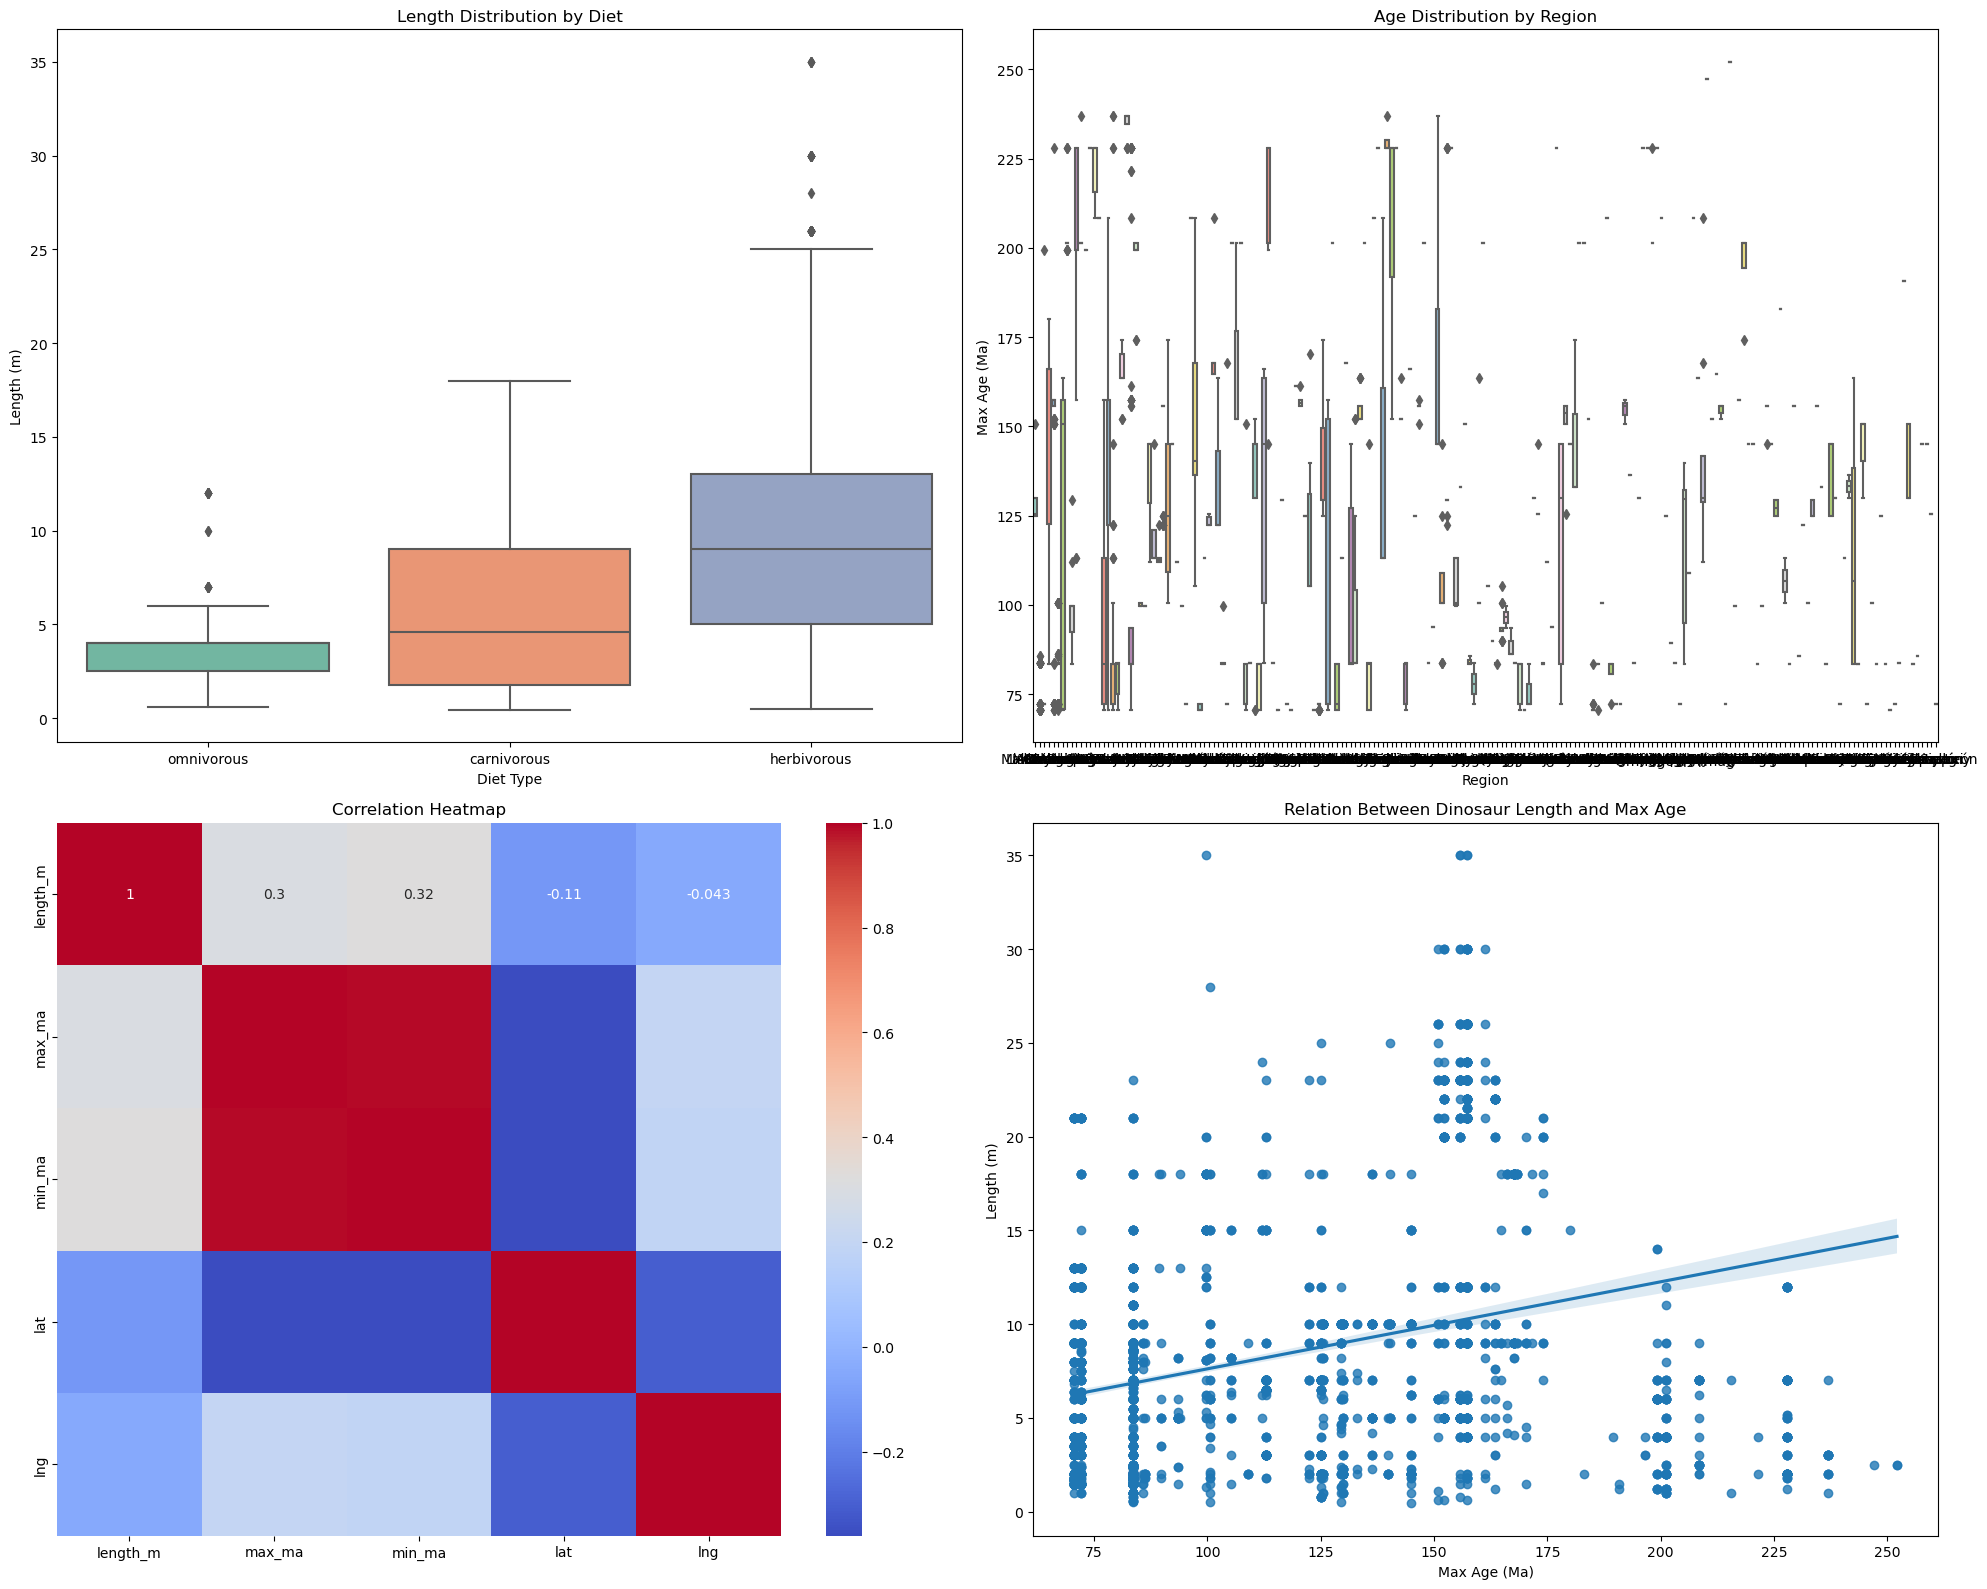

In [23]:
# Analysis of Length Distribution by Diet Type, Age Distribution by Region, Heatmap, and Relation between Dinosaur Length and Age using Subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Length Distribution by Diet Type
sns.boxplot(ax=axes[0, 0], x='diet', y='length_m', data=filtered, palette='Set2')
axes[0, 0].set_title('Length Distribution by Diet')
axes[0, 0].set_xlabel('Diet Type')
axes[0, 0].set_ylabel('Length (m)')

# Age Distribution by Region
sns.boxplot(ax=axes[0, 1], x='region', y='max_ma', data=filtered, palette='Set3')
axes[0, 1].set_title('Age Distribution by Region')
axes[0, 1].set_xlabel('Region')
axes[0, 1].set_ylabel('Max Age (Ma)')

# Heatmap
sns.heatmap(ax=axes[1, 0], data=filtered[['length_m', 'max_ma', 'min_ma', 'lat', 'lng']].corr(), annot=True, cmap='coolwarm')
axes[1, 0].set_title('Correlation Heatmap')

# Relation between Dinosaur Length and Max Age
sns.regplot(ax=axes[1, 1], x='max_ma', y='length_m', data=filtered)
axes[1, 1].set_title('Relation Between Dinosaur Length and Max Age')
axes[1, 1].set_xlabel('Max Age (Ma)')
axes[1, 1].set_ylabel('Length (m)')

plt.tight_layout()
plt.show()

## Insights of the above dashboard

### 1. Length Distribution by Diet
This box plot shows the distribution of dinosaur lengths based on their diet.
Herbivorous dinosaurs have the highest median length and the widest range, indicating significant size variation among herbivores.
Carnivorous dinosaurs have a moderate median length and range.
Omnivorous dinosaurs are the smallest on average, with the narrowest range of lengths.
This confirms the trend observed in earlier dashboards, where herbivores are generally larger.

## 2. Age Distribution by Region
This box plot displays the distribution of the maximum ages (max_ma) of dinosaur fossils across different regions.
The plot shows a wide range of ages within each region, indicating that dinosaurs of different periods have been discovered in the same geographical locations.
Some regions have a higher concentration of older fossils, while others show more variability.
The presence of outliers suggests occasional discoveries of significantly older or younger fossils within each region.

## 3. Correlation Heatmap
This heatmap shows the correlation coefficients between different numerical variables in the dataset.
A strong positive correlation (close to 1) between max_ma and min_ma indicates that regions with older maximum ages also tend to have older minimum ages.
The negative correlation between latitude and max_ma suggests that fossils found at higher latitudes tend to be older.
Other correlations are weaker but still provide useful insights into the relationships between different variables.

## 4. Relation Between Dinosaur Length and Max Age
This scatter plot shows the relationship between dinosaur length and their maximum age (max_ma), with a regression line to indicate trends.
There is a slight positive trend, suggesting that dinosaurs might have become slightly larger over time, but the correlation is weak.
The scatter plot shows a wide range of lengths across different ages, indicating a diverse range of dinosaur sizes throughout different periods.
The weak trend suggests that other factors besides time influenced dinosaur size.


# Answering the scpecific Questions

## 1. Number of Different Dinosaur Names

The number of different dinosaur names gives us an idea of the diversity of dinosaurs recorded in this dataset. 
We can have two ways. First find the number of different Dinosaurs name before cleaning the data. And also can find it after cleaning the Data.



In [24]:
# Number of different dinosaur from the original Data
unique_dinosaur_names = dinosaurs['name'].nunique()
print("Number of different dinosaur names in original Data:", unique_dinosaur_names)

Number of different dinosaur names in original Data: 1042


In [25]:
# Number of different dinosaurs names in the Cleaned Data
unique_dinosaur_names = filtered['name'].nunique()
print("Number of different dinosaur names:", unique_dinosaur_names)

Number of different dinosaur names: 299


## 2. Largest dinosaur

From the analysis, the Largest dinosaur is Supersaurus with the length of 35cm.   

In [26]:
# Finding the largest dinosaur by length in meters
largest_dinosaur = filtered.loc[filtered['length_m'].idxmax()]

# Displaying the largest dinosaur's details
largest_dinosaur

occurrence_no           465134
name               Supersaurus
diet               herbivorous
type                  sauropod
length_m                  35.0
max_ma                   155.7
min_ma                   145.0
region                Colorado
lng                -108.397202
lat                  38.583099
class               Saurischia
continent        North America
cluster                      1
Name: 570, dtype: object

## 3. Dinosaur Type with Most Occurrences

In [27]:
# Dinosaur type with most occurrences
dinosaur_type_counts = filtered['type'].value_counts()

# Display the largest Dinosaur Type with Most Occurrences
most_common_dinosaur_type = dinosaur_type_counts.idxmax()
most_common_dinosaur_type_count = dinosaur_type_counts.max()

most_common_dinosaur_type, most_common_dinosaur_type_count

('ornithopod', 807)

## 4. Did Dinosaurs Get Bigger Over Time?
From the last dashboard with the plot of relation between Dinosaur Length and Max Age, we can investigate that there is a slight positive trend, suggesting that dinosaurs might have become slightly larger over time, but the correlation is weak. The scatter plot shows a wide range of lengths across different ages, indicating a diverse range of dinosaur sizes throughout different periods. The weak trend suggests that other factors besides time influenced dinosaur size. The Dinosaurs did not get bigger Over time. 

## 5. Interactive Map of Records
An interactive map helps visualize the geographical distribution of dinosaur records. By plotting each record on a map, we can see where different types of dinosaurs were found.
The interactive map reveals the spatial distribution of dinosaur fossils. Different colors represent different dinosaur types, allowing us to see geographical patterns and potentially identify regions with rich fossil records.
    


# Summary Analysis
This analysis provides a comprehensive exploration of a dinosaur dataset, including data cleaning, statistical summaries, visualizations, and specific insights.
The overall quality of the data is strong. The dataset benefits from precise geographical details, such as latitude and longitude coordinates, enabling detailed mapping of fossil discoveries. Additionally, it provides a broad temporal range with information on the maximum and minimum ages of fossils, facilitating an analysis of dinosaur existence over time. There is no clear trend indicating that dinosaurs consistently got bigger over time, suggesting a wide range of sizes coexisted throughout different periods.

However, there are some weaknesses to address. Certain fields, such as `length_m` and `type`, have missing values that need to be filled through imputation or further research. There is also a potential sampling bias toward well-explored regions like North America and Europe, which could overlook less-studied areas. Inconsistent data recording and classification may affect the dataset's accuracy and consistency. To improve data quality, it's recommended to address missing values, expand exploration efforts to underrepresented regions, and implement standardized protocols for data recording and classification.

